# Get the image of a given row

In [131]:
# Setup for Jupyter Notebook environment
import sys
import os

%load_ext autoreload
%autoreload 2

# Add src/ to Python path
sys.path.append(os.path.abspath("../src"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
import pandas as pd

df = pd.read_csv('../data/GalaxyZoo1_DR_table2.csv')

In [133]:
import ipywidgets as widgets
from IPython.display import display

num_rows = df.shape[0]

input = widgets.BoundedIntText(
    value=12345,
    min=0,
    max=num_rows - 1,
    step=1,
    description='Row Number:',
)
display(input)


BoundedIntText(value=12345, description='Row Number:', max=667943)

In [134]:
rowNumber = input.value
print(f"Row number: {rowNumber}")

row = df.iloc[rowNumber]

coords = {'RA': row['RA'], 'DEC': row['DEC']}
coords

Row number: 12345


{'RA': '01:16:41.87', 'DEC': '+14:17:16.5'}

In [135]:
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_str = coords['RA']
dec_str = coords['DEC']

coord = SkyCoord(ra_str, dec_str, unit=(u.hourangle, u.deg), frame="icrs")

degree_coords = {'RA': coord.ra.deg, 'DEC': coord.dec.deg}
degree_coords

{'RA': np.float64(19.17445833333333), 'DEC': np.float64(14.287916666666666)}

#### Get Image from SDSS API

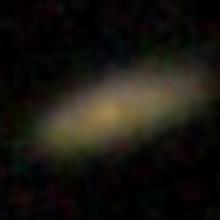

In [136]:
from images import get_image_sdss

query = {
    'scale': 0.1,
    'width': 220,
    'height': 220,
    'opt': '',
}

jpeg_image = get_image_sdss(degree_coords, query)
jpeg_image

#### Get Image from SkyView

In [137]:
from images import get_image_skyview
import astropy.units as u

options = {
    'height': 0.005 * u.deg,
    'width': 0.005 * u.deg,
    # 'pixels': 2000
}

image_hdu = get_image_skyview(degree_coords, options)
image_hdu.info()
image_hdu

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (300, 300)   float32   


#### Draw Image from SkyView HDU

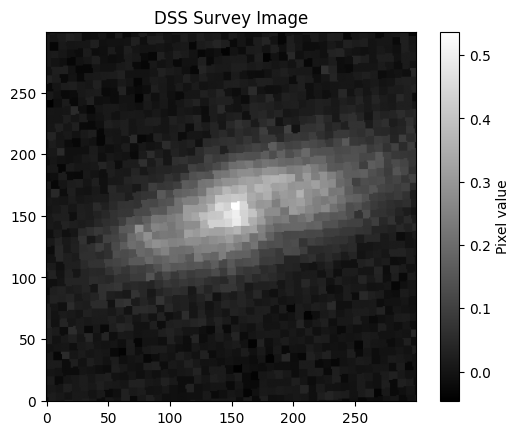

In [138]:
import matplotlib.pyplot as plt

data = image_hdu[0].data

plt.imshow(data, cmap='gray', origin='lower')
plt.title("DSS Survey Image")
plt.colorbar(label='Pixel value')
plt.show()

#### Draw Image from SDSS Jpeg API

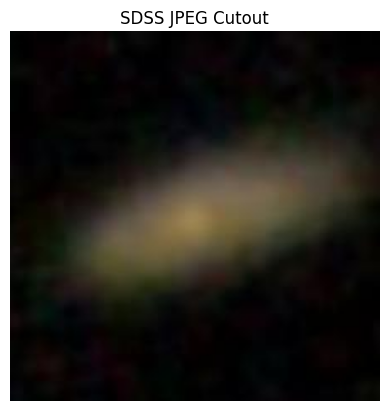

In [139]:
import matplotlib.pyplot as plt

plt.imshow(jpeg_image)
plt.axis("off")
plt.title("SDSS JPEG Cutout")
plt.show()